치료용 단클론 항체(mAbs)는 바이오의약품 시장의 70% 이상을 차지하며 지속적으로 성장하고 있습니다. 항체 개발 초기 단계에서 치료제 및 진단 도구로 사용하기 위해 적절한 특성을 가진 후보를 선별하는 것이 중요합니다. 에피토프 빈닝은 mAbs가 표적 단백질(항원)에 결합하는 특성을 파악하는 방법입니다. 이 과정에서 동일한 표적 단백질에 특이적인 mAbs를 쌍으로 테스트하여 항원의 특정 부위에 대한 결합을 서로 차단하는지 여부를 평가합니다. 같은 에피토프에 대한 결합을 차단하는 mAbs는 함께 "빈"으로 분류됩니다. 같은 빈에 속한 mAbs는 종종 유사한 기능을 하므로 에피토프 빈을 통해 후보 항체의 다양성을 확인 할 수 있습니다. 에피토프 다양성은 지적 재산권 보호를 확대하는 데도 중요합니다. 예를 들면 항체들이 같은 항원에 결합하더라도 작용 메커니즘이 다를 수 있는데 이는 일부 암과 감염성 질환 치료에 중요하기 때문입니다. 

> 에피토프 빈닝은 에피토프 매핑과 혼동해서는 안 됩니다. 에피토프 매핑에서는 항원의 개별 단편에 대한 항체 결합을 테스트하여 항체가 결합하는 항원의 특정 에피토프를 정의합니다.

SPR을 이용한 에피토프 빈닝의 주요 장점은 항원과 소량의 정제된 항체만 있으면 테스트할 수 있다는 것입니다. SPR을 통한 에피토프 비닝의 원리를 간략하게 설명하면 다음과 같습니다. 첫번째 항체를 고정시켜 놓고 항원과 두번째 항체를 넣어서 RU값을 측정하는데, 에피토프가 겹치지 않는 경우에 RU 값이 높게 측정됩니다. 즉, 에피토프가 비슷한 경우는 RU 값이 낮게 측정되는 것입니다. 이제 SPR을 통해 얻은 epitope binning 데이터를 파이썬으로 분석해서 어떤 항체 커뮤니티가 있는지 식별해보도록 하겠습니다.

# 데이터 준비

[Tom Z Yuan et al](https://doi.org/10.1093/abt/tbaa016)에서 공개한 데이터를 가지고 시작해보겠습니다.

In [ ]:
import pandas as pd

# 데이터 불러오기(원본 데이터는 wide 형태의 데이터 입니다.)
df = pd.read_csv("../data/input/EpitopeBinning.csv", index_col=0)

# wide데이터를 tidy 형태로 변환
tidy_df = df.reset_index().melt(id_vars="mAb ID", var_name="Antigen", value_name="Binding Value")
tidy_df.columns = ["First_ab", "Second_ab", "Binding"]
tidy_df = tidy_df.set_index("First_ab").sort_values(by="Binding", ascending=False)
# 변환한 데이터 저장하기

# 히트맵을 그리기 위해 다시 wide로 만들기
wide_data = tidy_df.pivot_table(
    index="First_ab",
    columns="Second_ab",
    values="Binding",
    aggfunc="mean",
)
wide_data.head()

Second_ab,ADI-15734,ADI-15741,ADI-15742,ADI-15743,ADI-15751,ADI-15757,ADI-15767,ADI-15776,ADI-15779,ADI-15782,...,ADI-16003,ADI-16017,ADI-16025,ADI-16031,ADI-16032,ADI-16047,ADI-16050,FVM09,KZ52,mab100
First_ab,,,,,,,,,,,,,,,,,,,,,
ADI-15734,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,...,2.0,2.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0
ADI-15741,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,...,2.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
ADI-15742,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,1.0,0.0,...,2.0,2.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0
ADI-15743,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,0.0,...,2.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
ADI-15751,1.0,2.0,1.0,2.0,0.0,1.0,2.0,2.0,1.0,1.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0


In [ ]:
tidy_df.describe()

,Binding
count,2563.000000
mean,1.304331
std,0.870324
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


위의 결과를 통해 데이터의 형태를 파악할 수 있습니다. 총 2563개가 있고 최대값과 최소값을 보아하니 실제 실험 값이 아닌 일종의 후처리가된 값으로 구성되어 있음을 알 수 있습니다.

# 시각화

## 히트맵 

히트맵은 차단, 비차단 및 불확실한 항체 쌍에 대한 빠른 개요를 제공합니다. 이를 통해 히트맵 내 데이터를 간편하게 검사할 수 있으며 다음과 같은 이점을 제공합니다:

1. 직관적 이해: 복잡한 데이터를 색상 코드로 표현하여 한눈에 파악할 수 있습니다.
2. 패턴 식별: 대량의 데이터에서 패턴이나 트렌드를 쉽게 발견할 수 있습니다.
3. 유연한 분석: 컷오프 값을 조정함으로써 다양한 조건에서 데이터를 분석할 수 있습니다.
4. 효율적인 데이터 해석: 많은 양의 정보를 압축된 형태로 표현하여 빠른 의사결정을 돕습니다.

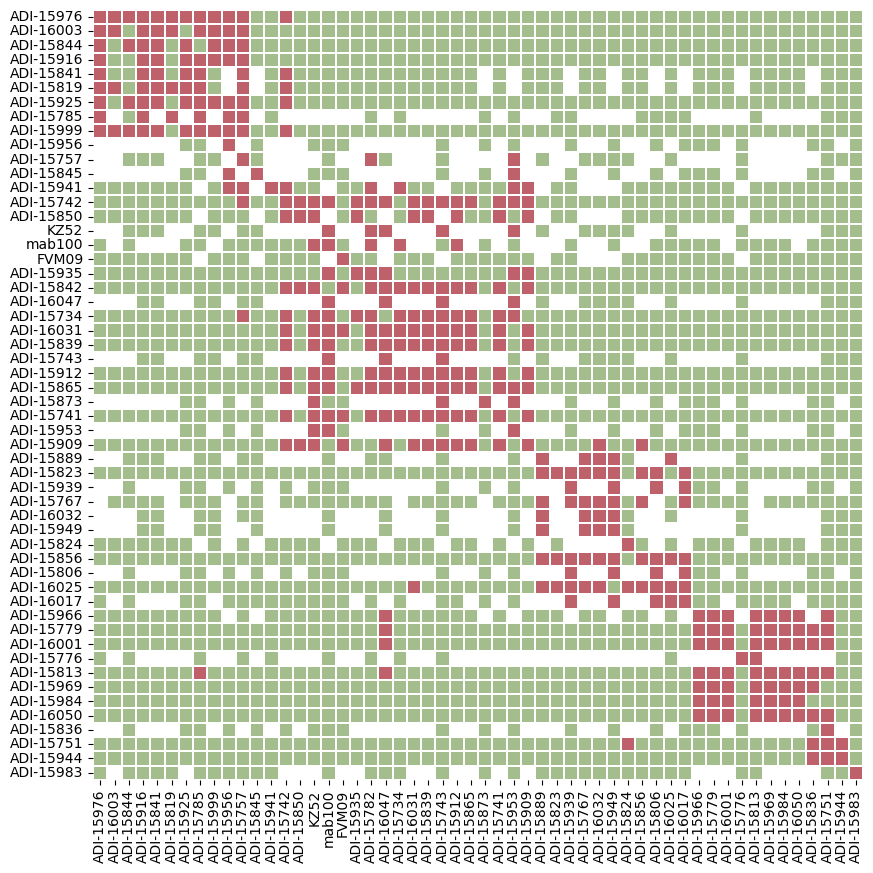

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Nord Aurora 색상
# A3BE8C: Nord8 (녹색)
# EBCB8B: Nord9 (노란색)
# BF616A: Nord11 (빨간색)
aurora_colors = ["#BF616A", "#EBCB8B", "#A3BE8C"]

# 사용자 정의 색상 맵 생성
cmap = sns.color_palette(aurora_colors)

# 마스크 생성: NaN은 True, 나머지는 False
mask = np.isnan(wide_data)

plt.figure(figsize=(10, 10))
sns.heatmap(
    df,
    cmap=cmap,
    annot=False,
    linewidths=0.1,
    mask=mask,
    vmin=0,  # 최소값을 0으로 설정
    vmax=1,  # 최대값을 1로 설정 (필요에 따라 조정)
    center=0.5,  # 중간값을 0.5로 설정
    cbar_kws={"label": "Value"},
    cbar=False,
    square=True,
)

plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

위 히트맵 결과를 통해 크게 4개의 클러스터가 존재하고 있다는 것을 쉽게 유추할 수 있습니다. 

## KNN 클러스터링 및 네트워크 시각화

K-Nearest Neighbors (KNN) 클러스터링은 에피토프 빈닝 데이터를 분석하고 시각화하는 데 유용한 방법으로 히트맵보다 더 명료한 결과를 보여줍니다.

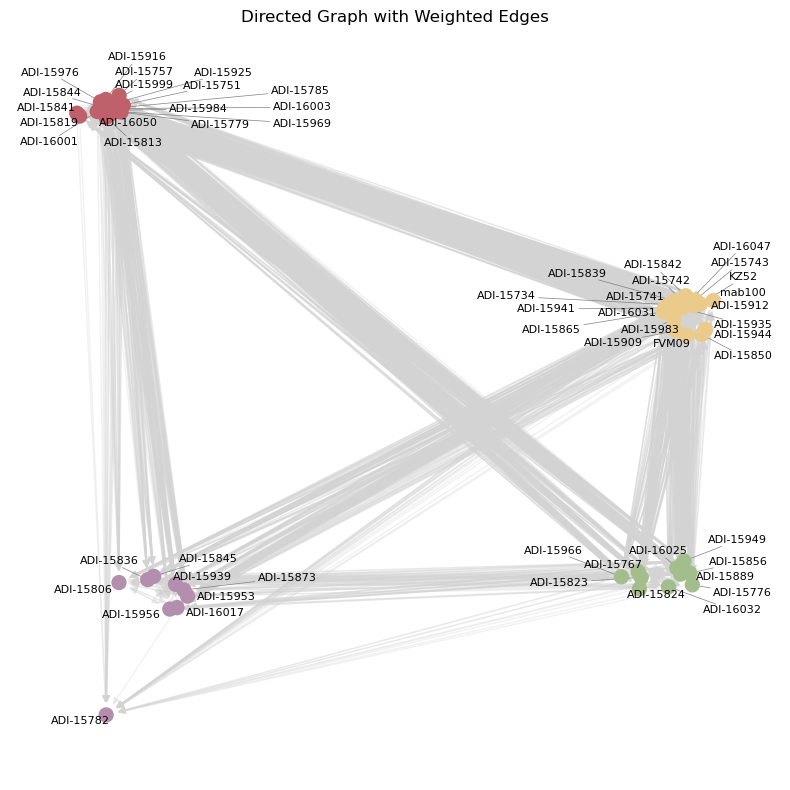

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
from adjustText import adjust_text
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = tidy_df.reset_index()

# NaN 값을 포함한 행 제거 및 First_ab와 Second_ab가 동일한 행 제거
data_clean = data.dropna().query("First_ab != Second_ab")

# 방향성 그래프 생성
G = nx.DiGraph()
for _, row in data_clean.iterrows():
    G.add_edge(row["First_ab"], row["Second_ab"], weight=row["Binding"])

# 인접 행렬 생성
adj_matrix = nx.to_numpy_array(G)

# 특성 스케일링
scaler = StandardScaler()
adj_matrix_scaled = scaler.fit_transform(adj_matrix)

# KMeans 클러스터링
n_clusters = 4  # 클러스터 수 고정
kmeans = KMeans(n_clusters=n_clusters, random_state=420)
cluster_labels = kmeans.fit_predict(adj_matrix_scaled)

# 클러스터 정보 저장
partition = dict(zip(G.nodes(), cluster_labels))

# 클러스터 중심 계산
cluster_centers = kmeans.cluster_centers_


# 노드 위치 조정 함수
def adjust_positions(pos, partition, cluster_centers):
    new_pos = {}
    for node, position in pos.items():
        cluster = partition[node]
        center = cluster_centers[cluster][:2]  # 2D 좌표만 사용
        # 노드를 클러스터 중심 방향으로 이동
        new_pos[node] = position * 0.3 + center * 0.7
    return new_pos


# 그래프 시각화
plt.figure(figsize=(8, 8))  # 그림 크기를 더 크게 조정
pos = nx.spring_layout(G, k=0.5, iterations=50)
pos = adjust_positions(pos, partition, cluster_centers)

# 노드 색상 설정
colors = [partition[node] for node in G.nodes()]

# Nord Aurora 색상 정의
aurora_colors = ["#A3BE8C", "#EBCB8B", "#D08770", "#BF616A", "#B48EAD"]

# Aurora 색상으로 ColorMap 생성
aurora_cmap = mcolors.ListedColormap(aurora_colors)

# 노드 그리기
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=100, cmap=aurora_cmap)

# 엣지 그리기 (방향성과 가중치 반영)
edge_weights = [G[u][v]["weight"] for u, v in G.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (w / max_weight) for w in edge_weights]

nx.draw_networkx_edges(
    G,
    pos,
    alpha=0.3,
    edge_color="lightgray",
    # width=edge_widths,
    arrows=True,
    arrowsize=10,
)

# 라벨 위치 조정을 위한 준비
texts = []
for node, (x, y) in pos.items():
    texts.append(plt.text(x, y, node, fontsize=8, ha="center", va="center"))

# 라벨 위치 자동 조정
adjust_text(texts, arrowprops={"arrowstyle": "-", "color": "gray", "lw": 0.5})

plt.title("Directed Graph with Weighted Edges")
plt.axis("off")
plt.tight_layout()
plt.show()

위의 결과를 통해 총 4개의 항체의 클러스터를 확인 할 수 있었고 히트맵 결과와 유사함이 확인되었습니다.

# 마치며

에피토프 빈닝은 항체의 결합 특성을 파악하고 다양한 에피토프를 표적으로 하는 항체를 선별할 수 있습니다. 히트맵과 KNN 클러스터링 등의 시각화 방법으로 항체 패널의 다양성을 확인하고 가장 유망한 후보를 선별하는 데 도움을 줍니다.